# Loan Default analysis

For this project, I want to look at the credit risk dataset and train a Machine learning (ML) model to predict whether the loan is going to default or not. The credit risk dataset has information about the age, income, homeownership, employment length, loan intent and 6 more variables along with actual information about whether the loan defaulted as Y/N. **I want to train a classifier that can predict whether a loan is going to default given a set of parameters.** First, I will train a Decision Tree classifier and then improve on it with a Random Forest classifier to study on a training set of data and make a prediction on a test set.

I will go through all the usual data analysis steps of **loading and cleaning the data, exploratory data analysis via outlier detection and correlation matrix, encode the labels for ML, split the data into training and test set, do a grid search to find optimal hyperparameters of the model and finally measure the performance of the ML model.**

### Loading and cleaning the data.

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [120]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


**Note: Std. deviation of income is almost the same as the mean.**

In [122]:
df.shape

(32581, 12)

**Checking for null and na values.**

In [123]:
# check for na values.
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [124]:
# check for na values.
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Employment length and loan interest rate columns have null/na values. **Filling these with the mean value of the columns.**

In [125]:
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace = True)
df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace = True)

In [127]:
# check that the changes indeed got propagated and now there are no null values.
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### Exploring the data.

Doing exploratory data analysis, checking for outliers, correlations and visualizing the data.

In [129]:
# listing all the columns.
columns = df.columns.tolist()
columns

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [130]:
# Listing out all the non-numerical or object data types.
obj = df.select_dtypes(include='object').columns
obj

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

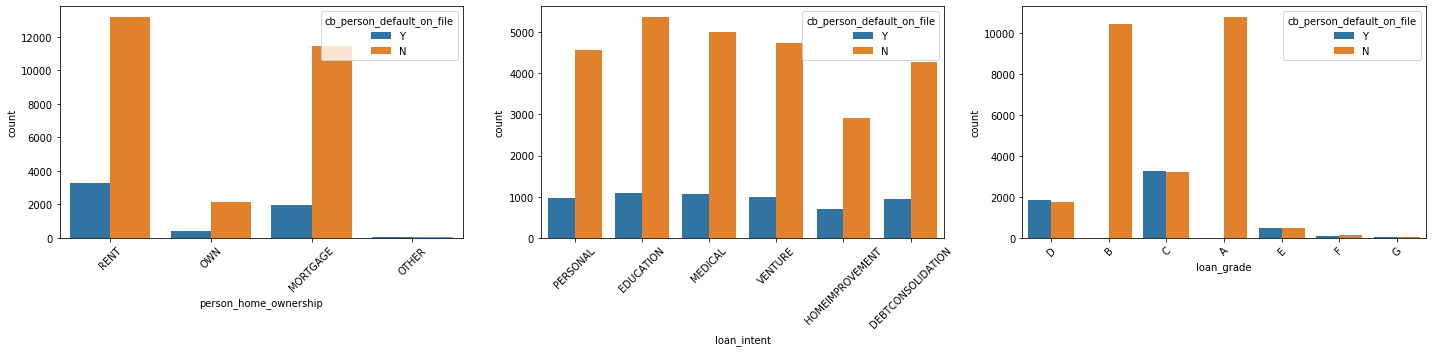

In [132]:
# Plotting count of default and non default as a function of the 'object' variables.
%matplotlib inline

obj1 = ['person_home_ownership', 'loan_intent', 'loan_grade']
fig, ax = plt.subplots(1,3,figsize = (20,5))
ax = ax.flatten()
for i, var in enumerate (obj1):
    sns.countplot(data = df,x=var,hue = 'cb_person_default_on_file', ax = ax[i])
    ax[i].tick_params(axis = 'x', labelrotation=45)
plt.tight_layout()

**Note: According to the above visual, loan grade seems to be a very import feature.** Loans with grade A and B almost never default, whereas grade D and C have equal chance to default vs not.

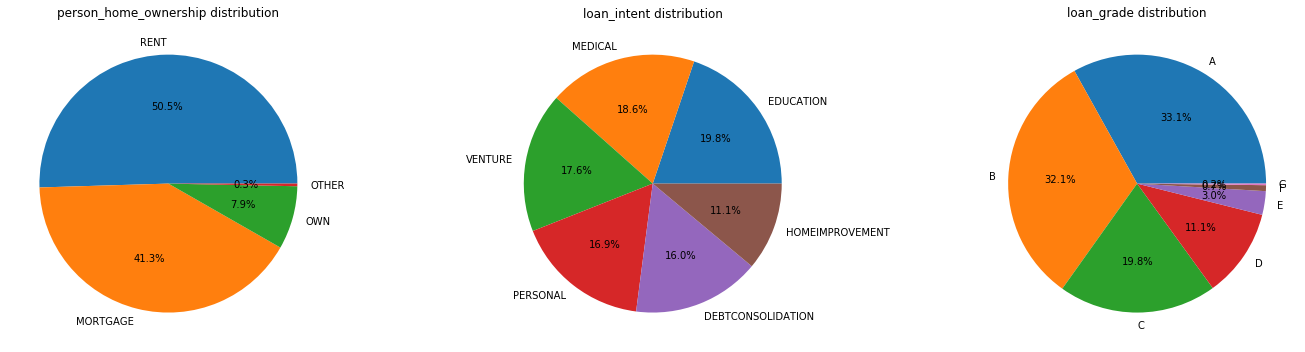

In [134]:
# Plotting distribution of loan with respect to homeownership, loan intent and loan grade.

fig,ax = plt.subplots(1,3, figsize=(20,5))

for i, var in enumerate (obj1):
    if i < len(ax.flat):
        obj_cont = df[var].value_counts()
        ax.flat[i].pie(obj_cont, labels = obj_cont.index, autopct = "%1.1f%%")
        ax.flat[i].set_title(f'{var} distribution')
fig.tight_layout()
plt.show()

This visual shows that:
    1) Most people getting loans rent their home.
    2) The reason for loan is very evenly distributed between Education, Medical and Venture.
    3) Most of the loans are either grade A or grade B.

<IPython.core.display.Javascript object>


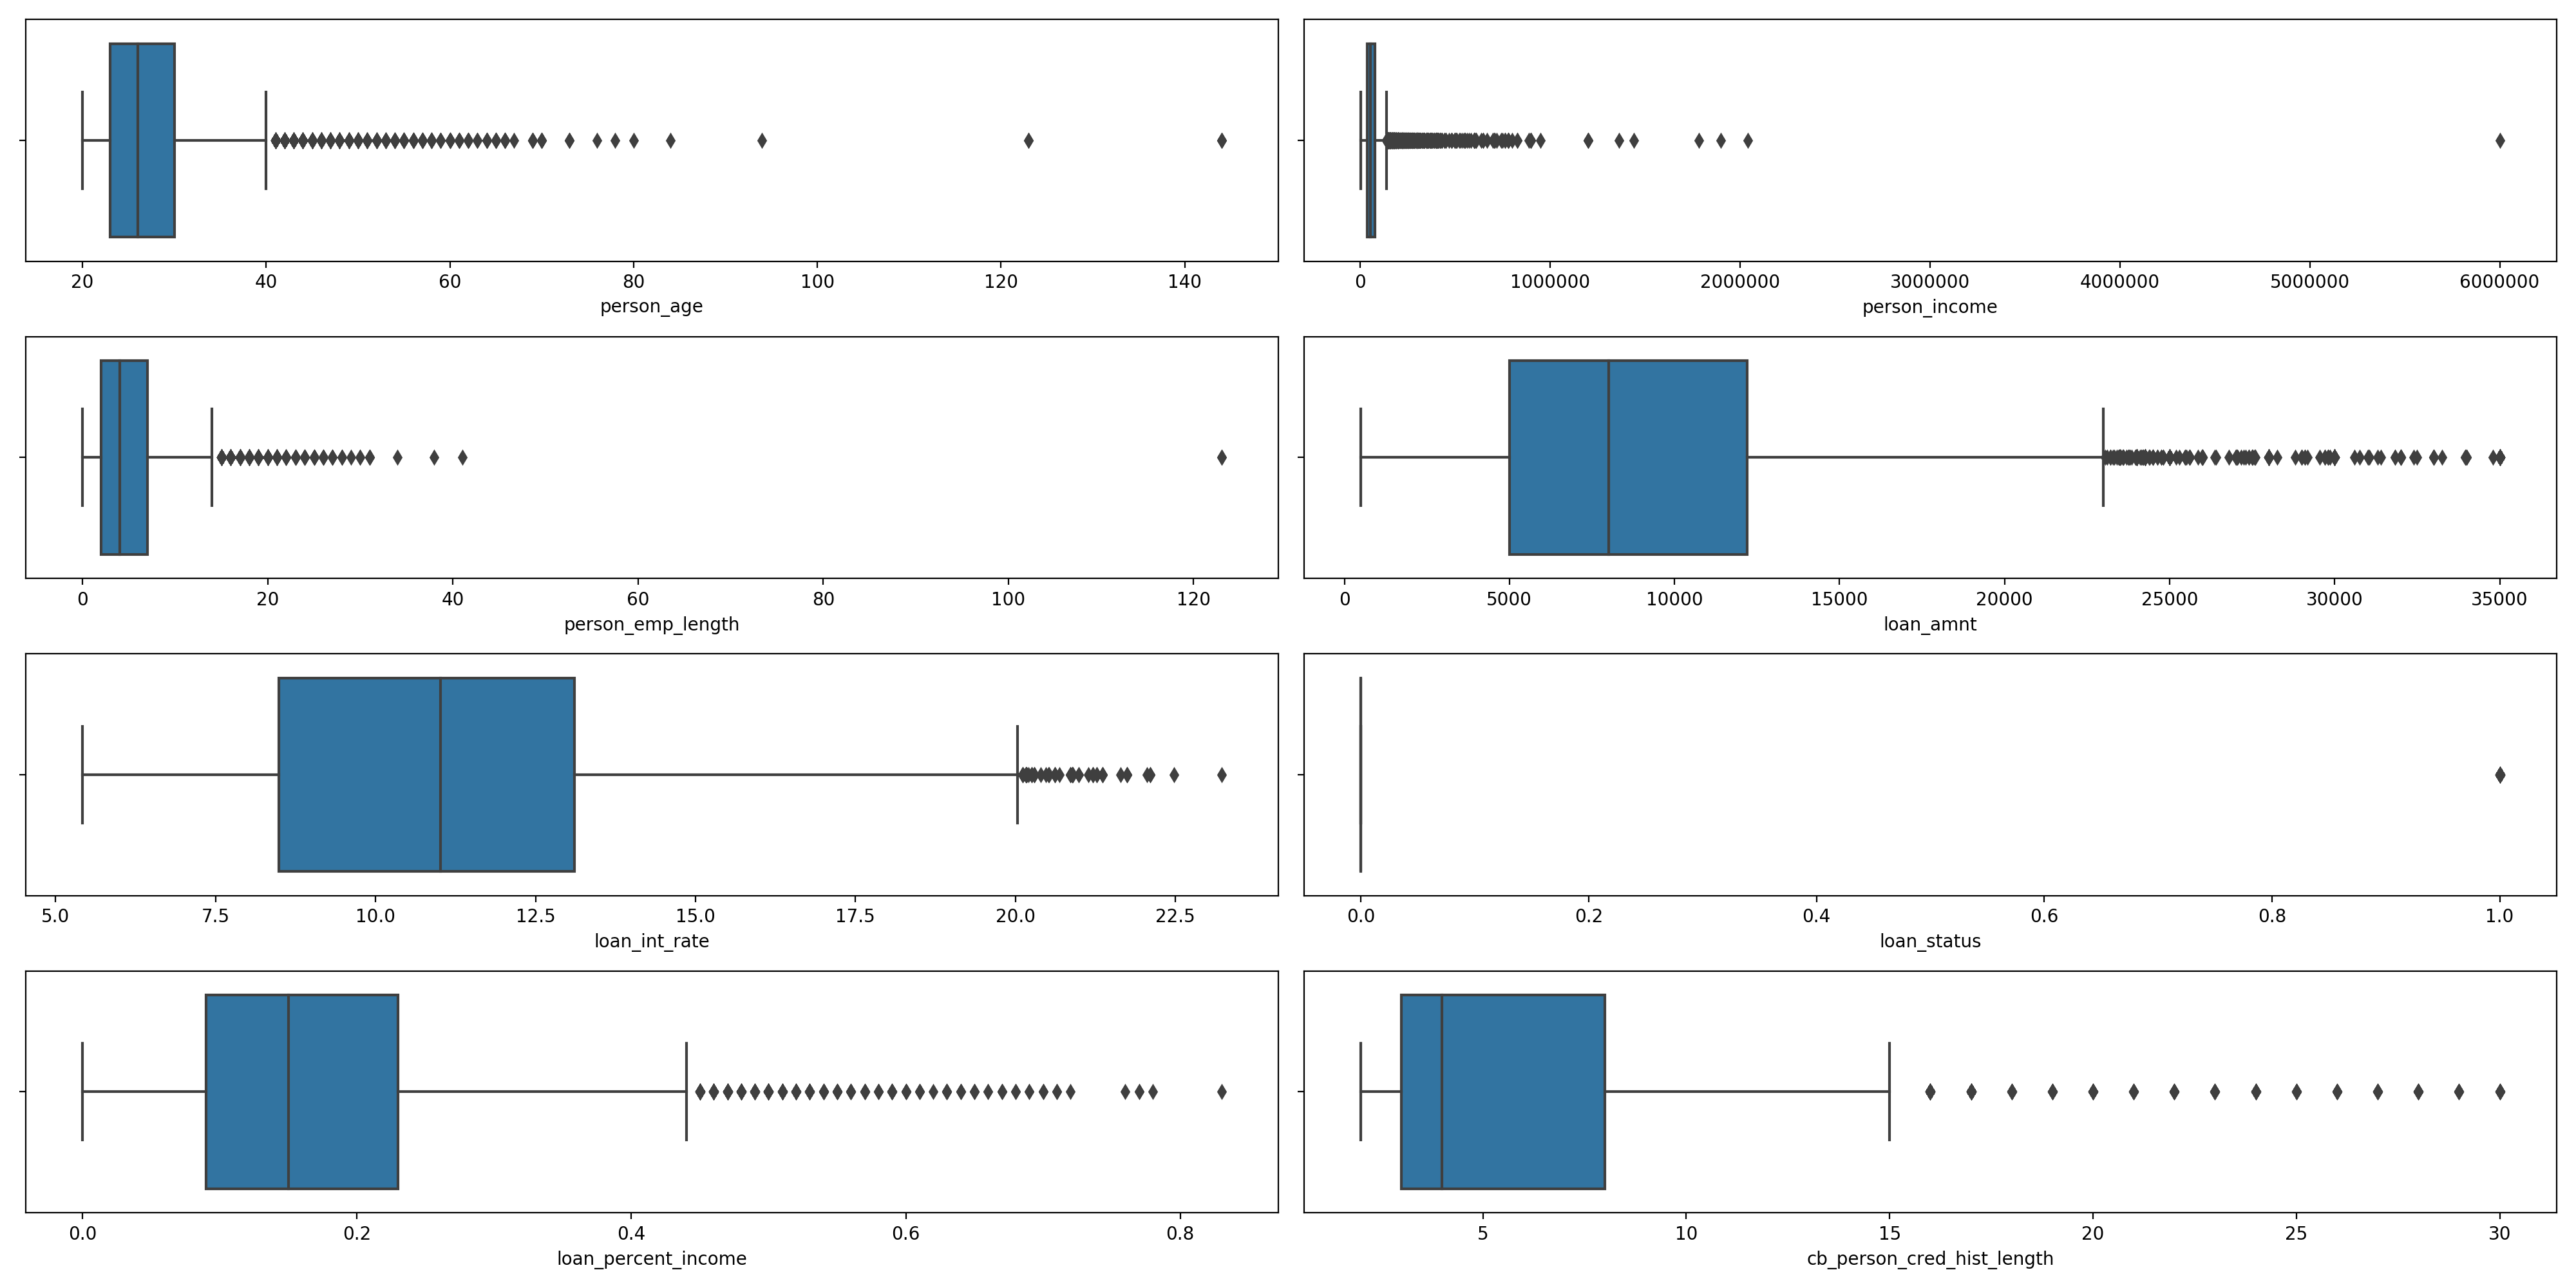

In [55]:
# Looking for any outliers.
var = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status',
       'loan_percent_income', 'cb_person_cred_hist_length']
fig,ax = plt.subplots(4,2,figsize = (20,10))
ax = ax.flatten()

for i, var in enumerate(var):
    sns.boxplot(data = df, x = var, ax = ax[i])
fig.tight_layout()    

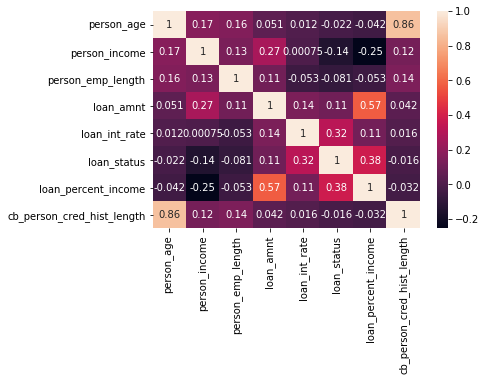

In [135]:
# Looking for any highly correlated columns.
sns.heatmap(data = df.corr(), annot = True)
fig.tight_layout()

Some highly correlated variables are: (person_age, credit_history_length), (loan_amount, loan_percent_income) both of which make sense logically. The older a person is the more likely that they have a longer credit history and the lower the loan_percent_income is the more likely that they get approved for bigger loan amounts.

### Figuring out the important variables using chi-square test.

As an alternative to training ML model, here I am using Chi squared test to figure out some important features that are "good predictors". Later on, we can compare these features with what ML models tell us.

In [149]:
#import the necessary libraries for Chi_square test
from scipy.stats import chi2_contingency
import stat

In [137]:
#Select the categorical variables for chi_square test
obj=df.select_dtypes(include='object').columns
obj

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

person_home_ownership:


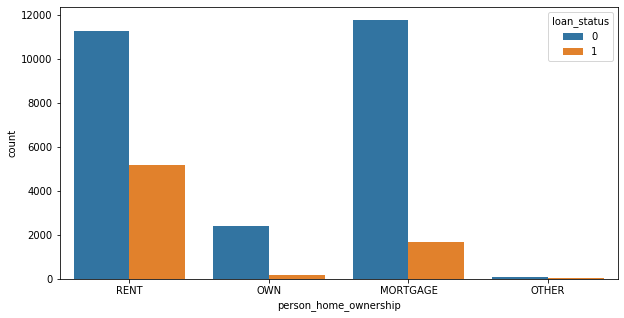

'person_home_ownership' is a Good Predictor.
p_val=0.0

loan_intent:


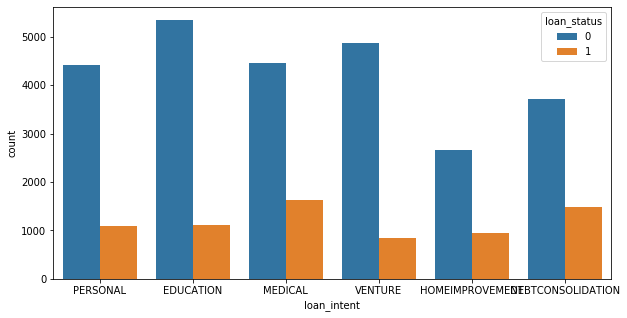

'loan_intent' is a Good Predictor.
p_val=2.980681669776041e-110

loan_grade:


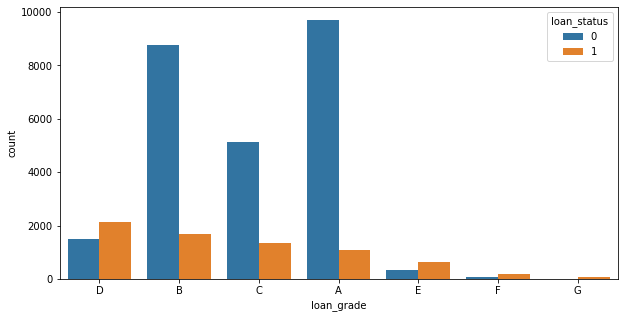

'loan_grade' is a Good Predictor.
p_val=0.0

cb_person_default_on_file:


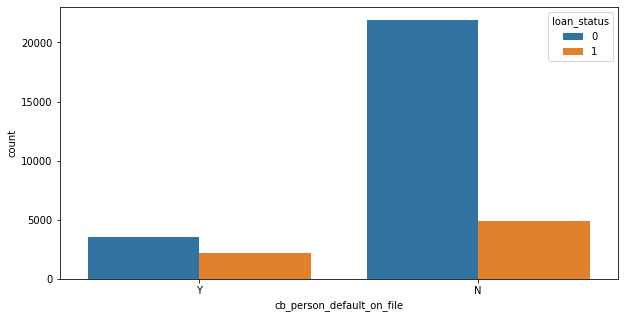

'cb_person_default_on_file' is a Good Predictor.
p_val=2.226322450790568e-229



In [138]:
#Create the loop for categorical value for chi_square test
for i in obj:
    print(i + ":")
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,hue="loan_status",x=i)
    plt.show()
    a=np.array(pd.crosstab(df.loan_status, df[i]))
    (stats,p,dof,_)=chi2_contingency(a,correction=False)
    if p >0.05:
        print("'{}' is a bad predictor.".format(i))
        print('p_val={}\n'.format(p))
    else:
        print("'{}' is a Good Predictor.".format(i))
        print('p_val={}\n'.format(p))

**According to the p value homeownership, loan intent and loan grade are good predictors.**

### Preprocessing the data to train an ML model.

I will now preprocess the data to be compatible with the training an ML model. ML models cannot work on categorical data and therefore need to be encoded to some numerical values. In our case, I will assign numbers for each category of categorical data.

In [140]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object').columns:
    print(f'{col}:{df[col].unique()}')

person_home_ownership:['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent:['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade:['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file:['Y' 'N']


In [141]:
# encode with numbers.
for col in df.select_dtypes(include='object').columns:
    lable_encode=LabelEncoder()
    lable_encode.fit(df[col].unique())
    df[col]=lable_encode.transform(df[col])
    print(f'{col}: {df[col].unique()}')

person_home_ownership: [3 2 0 1]
loan_intent: [4 1 3 5 2 0]
loan_grade: [3 1 2 0 4 5 6]
cb_person_default_on_file: [1 0]


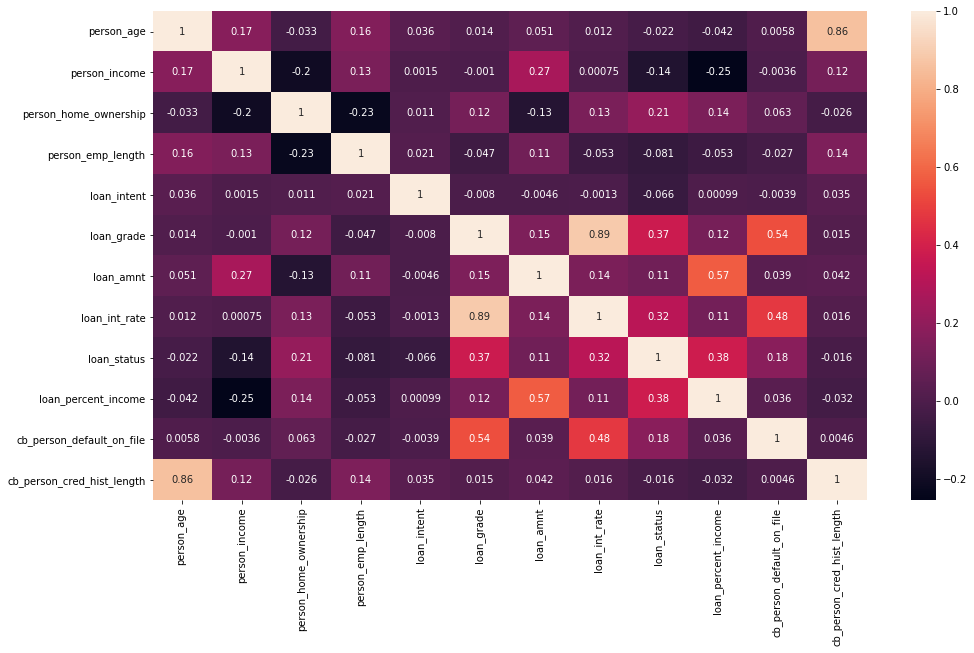

In [144]:
plt.figure(figsize = (16,9))
sns.heatmap(data=df.corr(),annot=True)

### Feature extraction and splitting the data.

The data once encoded needs to be split in X and y, where X is the feature matrix and y is the predictor varibale.

In [145]:
# splitting the data into X and y.
x = df.drop(['loan_status'],axis=1)
y = df['loan_status']
print(x.shape)
print(y.shape)

(32581, 11)
(32581,)


In [146]:
#split the data into training and tet set.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [150]:
#outlier removal.
from scipy import stats

num_col = ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income',
     'cb_person_cred_hist_length']

z_score = np.abs(stats.zscore(x_train[num_col]))
threshold = 3
outlier_index = np.where(z_score > threshold)[0]
X_Train = x_train.drop(x_train.index[outlier_index])
Y_Train = y_train.drop(y_train.index[outlier_index])

### Training a Decision tree clasifier first and evaluating its performance.

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score

**Finding the optimal max_depth hyperparameter using grid search. I am not optimizing other parameters for loss of generality.**

In [154]:
decison_tree=DecisionTreeClassifier(class_weight='balanced')
pram_grid={
    "max_depth":[3,4,5,6,7,8]
}

grid_search=GridSearchCV(decison_tree,pram_grid,cv=5)
grid_search.fit(X_Train,Y_Train)
print(grid_search.best_params_)

{'max_depth': 6}


In [155]:
# Training a decision tree with the optimized hyperparamter.
dtree=DecisionTreeClassifier(max_depth=6,random_state=42)
dtree.fit(X_Train,Y_Train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [169]:
# predicting and checking accuracy, precision score, recall score.
from sklearn.metrics import precision_score,recall_score, confusion_matrix

y_pred=dtree.predict(x_test)

print(f'Accuracy_score: ', round((accuracy_score(y_test,y_pred)),2))
print(f'Precision_score :',round((precision_score(y_test,y_pred,average='micro')),2))
print(f'Recall_score :',round((recall_score(y_test,y_pred,average='micro')),2))

Accuracy_score:  0.92
Precision_score : 0.92
Recall_score : 0.92


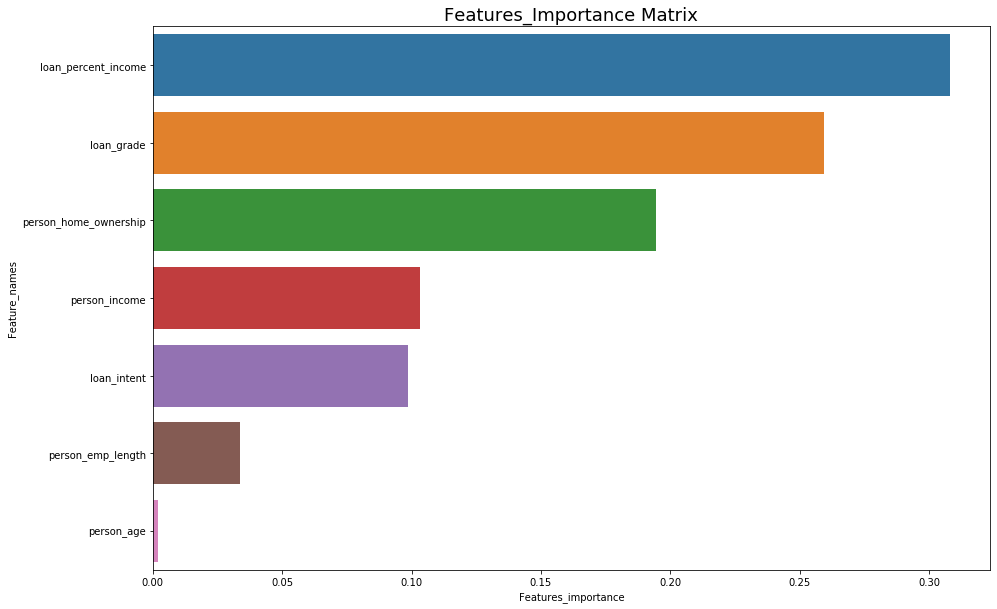

In [168]:
# Plotting the seven most important features according to the decision tree.

im_ft=pd.DataFrame({"Feature_names":X_Train.columns,"Features_importance":dtree.feature_importances_})
fe=im_ft.sort_values(by='Features_importance',ascending=False)
fe1=fe.head(7)
plt.figure(figsize=(15,10))
sns.barplot(data=fe1,x="Features_importance",y="Feature_names")
plt.title("Features_Importance Matrix",fontsize=18)
plt.show()

**According to the Decision Tree classifier loan_percent_income, loan_grade and homeownership are the three most important features.**

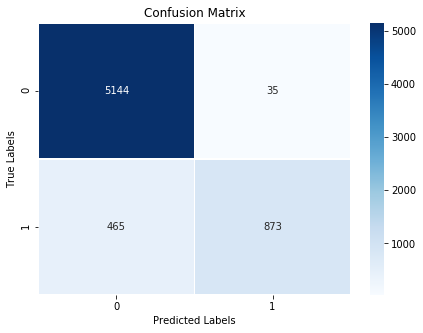

In [170]:
#plot the confusion matrix.
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(data=cm,annot=True,cmap="Blues",linewidths=0.5,fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show();

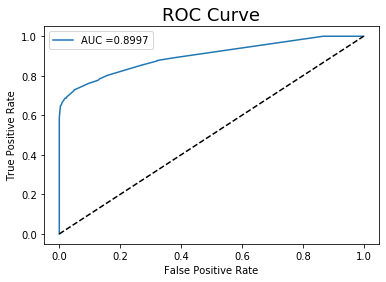

In [108]:
#Finally plotting the ROC curve and calculating the are under the ROC curve.

y_pred_prob = dtree.predict_proba(x_test)[:][:,1]
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),
                              pd.DataFrame(y_pred_prob,columns=['y_pred_prob'])],axis=1)


df_actual_predicted.index=y_test.index
fqr,tqr,tr=roc_curve(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])
auc=roc_auc_score(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])


plt.plot(fqr,tqr,label='AUC =%0.4f' %auc)
plt.plot(fqr,fqr,linestyle="--",color="k")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve",fontsize=18)
plt.legend();

The accuracy of even a very simple decision tree classifier is 92% which is very good. I will now try to improve on thiss by training a Random Forest classifier.

### Random Forest classifier.

In [171]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
}
grid_search=GridSearchCV(rfc,param_grid,cv=5)
grid_search.fit(X_Train,Y_Train)
print(grid_search.best_params_)

{'max_depth': None, 'n_estimators': 200}


In [172]:
#train the model using the optimized hyperparameters.
rfc1=RandomForestClassifier(n_estimators=200 ,max_depth=None ,max_features='sqrt')
rfc1.fit(X_Train,Y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [174]:
#prediction and scores.
y_prd=rfc1.predict(x_test)
print(f'Accuracy Score: {round(accuracy_score(y_test,y_prd),2)}')
print(f'Precision_score :{round(precision_score(y_test,y_prd,average="micro"),2)}')
print(f'Recall score :{round(recall_score(y_test,y_prd,average="micro"),2)}')

Accuracy Score: 0.93
Precision_score :0.93
Recall score :0.93


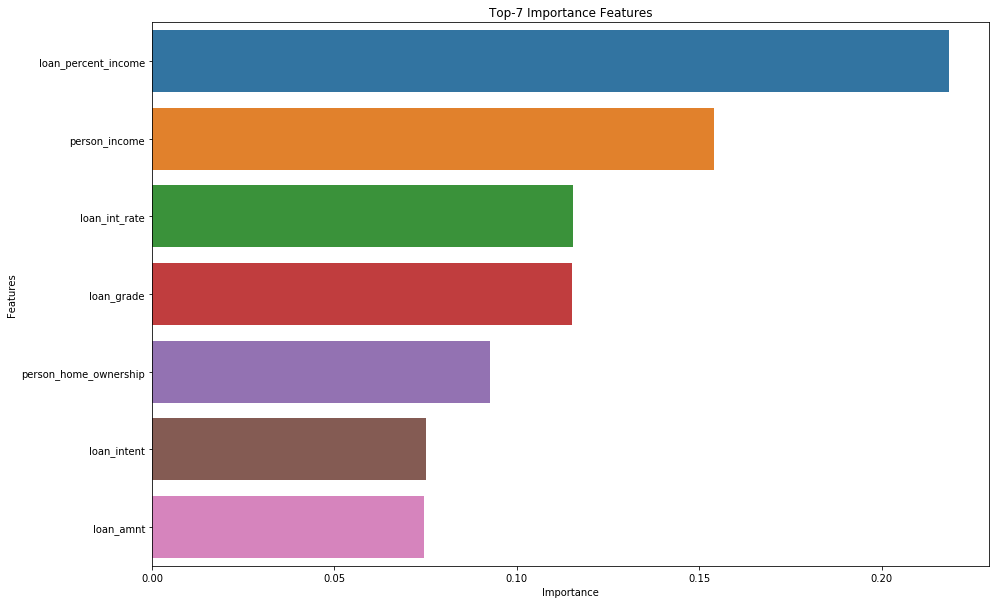

In [176]:
#Most important features according to random forest classifier.

imp_fea=pd.DataFrame({"Feature_name":X_Train.columns,"importance":rfc1.feature_importances_})
imp_fea1=imp_fea.sort_values(by='importance',ascending=False)
imp_fea2=imp_fea1.head(7)
plt.figure(figsize=(15,10))
sns.barplot(data=imp_fea2,x="importance",y="Feature_name")
plt.title('Top-7 Importance Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Text(33.0, 0.5, 'True Labels')

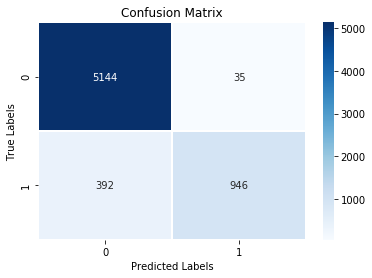

In [177]:
# The confusion matrix 
cm1=confusion_matrix(y_test,y_prd)
sns.heatmap(data=cm1,annot=True,cmap="Blues",linewidths=0.5,fmt="d");
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

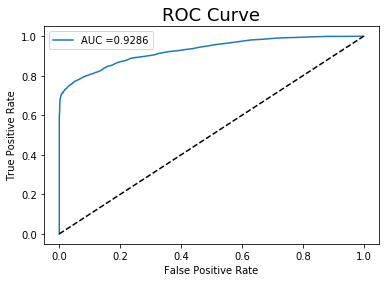

In [178]:
#plotting the ROC curve.
y_pred_prob=rfc1.predict_proba(x_test)[:][:,1]
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),
                              pd.DataFrame(y_pred_prob,columns=['y_pred_prob'])],axis=1)


df_actual_predicted.index=y_test.index
fqr,tqr,tr=roc_curve(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])
auc=roc_auc_score(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])


plt.plot(fqr,tqr,label='AUC =%0.4f' %auc)
plt.plot(fqr,fqr,linestyle="--",color="k")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve",fontsize=18)
plt.legend();

As you can see, the random forest classifier is performing only marginally better than the decision tree classifier.